# Tema 1. Introducción a la Optimización Combinatoria

### En esta clase ejercitaremos los conocimientos relacionados con la optimización combinatoria, la complejidad de los problemas de optimización y la diferencia entre los métodos clásicos y los métodos heurísticos.

In [104]:
# Comenzamos importando las librerías de python que serán utilizadas para desarrollar los ejercicios,
# lecturas de ficheros, imágenes, etcétera.
#import pandas as pd 
%matplotlib inline


import numpy as np
import pylab as pl
import matplotlib.cm as cm
import matplotlib
from PIL import Image as im
import math
#import cv2
#import pandas as pd 

from IPython.display import display
from IPython.display import Image

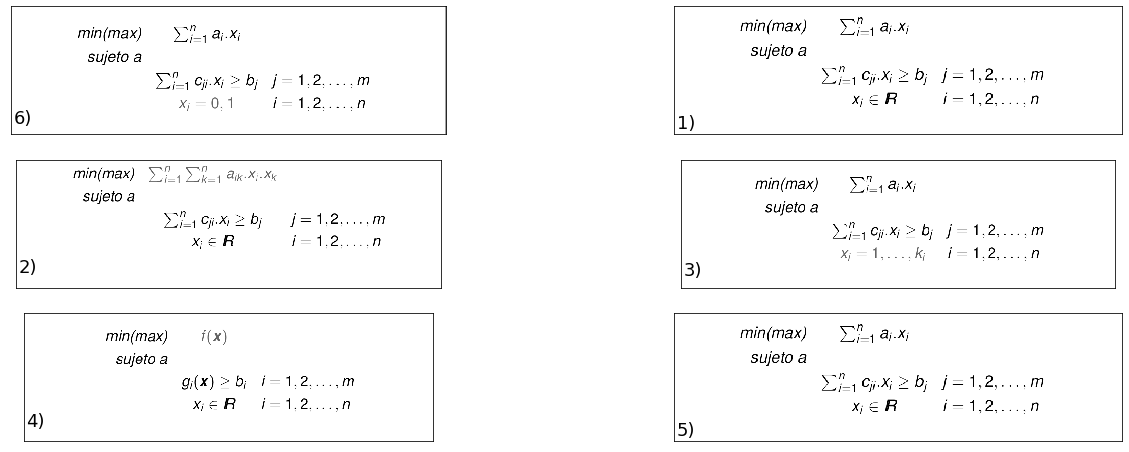

In [23]:
# Importamos varias imágenes, algunas de las cuales representan diferentes problemas de programación

matplotlib.rcParams['figure.figsize'] = (22,8)
f = pl.figure()
the_algorithms = ['Programación entera', 'Programación 0-1', 'Programación cuadrática', 'Programación lineal', 'Programación no lineal','Programación 0-1']
for n, fname in enumerate(('images/Opt-Prob1.png', 'images/Opt-Prob2.png','images/Opt-Prob3.png','images/Opt-Prob5.png','images/Opt-Prob6.png','images/Opt-Prob2.png')):
    image=im.open(fname).convert("L")    
    arr=np.asarray(image)
    f.add_subplot(3, 2, n+1)  # this line outputs images side-by-side   
    fig=pl.imshow(arr,cmap=cm.Greys_r)
    ttitle = str(np.mod((n)+5,6)+1)+')'                             
    pl.text(5,232,ttitle,size=18)    
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False) 
    
    

In [24]:
# A partir de los problemas de optimización representados en cada una de las imágenes anteriores
# Seleccione cuáles de las siguientes definiciones de los problemas son correctas

# 1) Problema de programación cuadrática
# 2) Problema de programación no-lineal
# 3) Problema de programación 0-1
# 4) Problema de programación entera
# 5) Problema de programación lineal
# 6) Problema de programación 0-1

## Introduzca su respuesta como en el siguiente ejemplo     
## donde cada número se corresponde con una posible respuesta correcta


%run ProblemasProgramacion.py 6 5

Todas las respuestas escogidas son correctas y no falta ninguna.


<Figure size 1584x576 with 0 Axes>

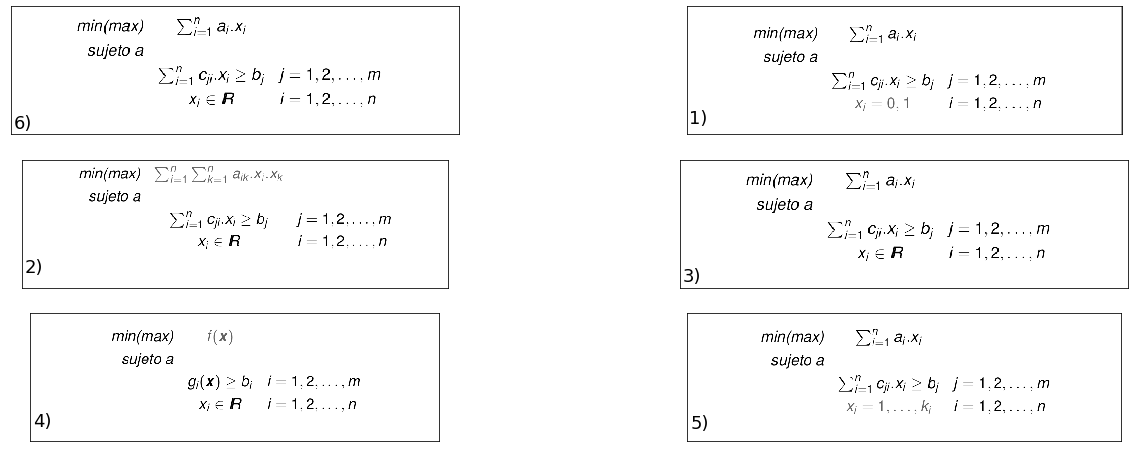

In [25]:
# Importamos varias imágenes, algunas de las cuales representan diferentes problemas de programación

matplotlib.rcParams['figure.figsize'] = (22,8)
f = pl.figure()
the_algorithms = ['Programación entera', 'Programación 0-1', 'Programación cuadrática', 'Programación lineal', 'Programación no lineal','Programación 0-1']
for n, fname in enumerate(('images/Opt-Prob2.png', 'images/Opt-Prob1.png','images/Opt-Prob3.png','images/Opt-Prob2.png','images/Opt-Prob6.png','images/Opt-Prob5.png')):
    image=im.open(fname).convert("L")    
    arr=np.asarray(image)
    f.add_subplot(3, 2, n+1)  # this line outputs images side-by-side    
    fig=pl.imshow(arr,cmap=cm.Greys_r)
    ttitle = str(np.mod(n+5,6)+1)+')'
    pl.text(5,232,ttitle,size=18)    
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False) 
    
    

In [26]:
# A partir de los problemas de optimización representados en cada una de las imágenes anteriores
# Seleccione cuáles de las siguientes métodos de solución son apropiados para cada uno de los problemas

# 1) Algoritmo ramificar y cortar (branch and bound)
# 2) Algoritmo Simplex 
# 3) Algoritmo ramificar y cortar (branch and bound)
# 4) Algoritmos núméricos (p.ej. Fletcher-Powell)
# 5) Algoritmos de programación cuadrática
# 6) Algoritmo Simplex 

## Introduzca su respuesta como en el siguiente ejemplo     
## donde cada número se corresponde con una posible respuesta correcta


%run AlgoritmosProgramacion.py 6 4

Todas las respuestas escogidas son correctas y no falta ninguna.


<Figure size 1584x576 with 0 Axes>

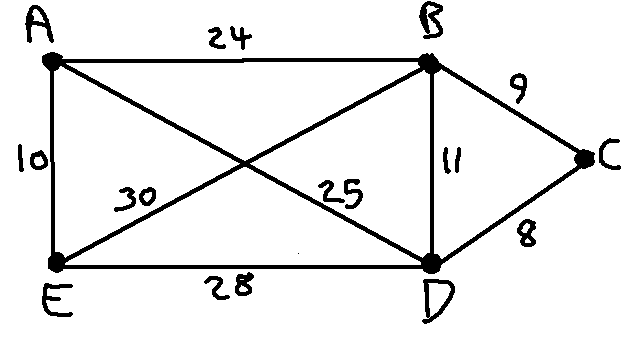

In [27]:
# Cargamos una imagen que describe una instancia del problema del agente viajero (TSP)
 
i = Image(filename='images/tsp1.png')
i

In [40]:
# Para la instancia anterior:

#    Calcule el valor de la solución óptima del problema TSP (suma de las distancias entre ciudades adyacentes 
#    en la solución)  
#
#
#    Utilizando la función Check_BestTSP.py compruebe si el valor calculado es el óptimo

# Ejemplo: Comprobaremos si el valor óptimo de la solución es 100

print("A->E->D->C->B->A = 10 + 28 + 8 + 9 + 24 = 79")
%run CheckBestTSP.py 79



A->E->D->C->B->A = 10 + 28 + 8 + 9 + 24 = 79
El valor escogido es correcto.


In [30]:
# La siguiente función lee una matriz de distancias entre ciudades 
# para la instancia del problema TSP 'Instances/TSP/Cebe.tsp.n10.1'

def Read_Instance(fname):
 hdl = open(fname, 'r')
 mylist = hdl.readlines()
 hdl.close()
 n = eval(mylist[0])
 distances  = np.zeros((n,n))
 for i in range(n):
   for j,val in enumerate(mylist[i+1].split()):     
     distances[i,j]=eval(val)
         
 return distances
                
TSP_Matrix =  Read_Instance('../Instances/TSP/Cebe.tsp.n10.1')
print(TSP_Matrix)

[[ 0.  3. 23. 33. 16. 18. 11. 31. 19. 42.]
 [ 3.  0. 29. 30. 31. 51. 23. 48. 31. 24.]
 [23. 29.  0. 38. 21. 41. 62. 10. 24.  7.]
 [33. 30. 38.  0. 45. 21. 32. 34.  6. 36.]
 [16. 31. 21. 45.  0. 19. 20. 20. 30. 34.]
 [18. 51. 41. 21. 19.  0. 29. 25. 40. 31.]
 [11. 23. 62. 32. 20. 29.  0. 14. 32. 45.]
 [31. 48. 10. 34. 20. 25. 14.  0. 35. 14.]
 [19. 31. 24.  6. 30. 40. 32. 35.  0. 36.]
 [42. 24.  7. 36. 34. 31. 45. 14. 36.  0.]]


In [59]:
# A partir de la matriz de distancias y utilizando la función Eval_TSP_instance, intente
# encontrar una solución que minimice tanto como sea posible la distancia

def Eval_TSP_instance(Dist_Matrix,perm):
 n = Dist_Matrix.shape[0]   
 perm = np.asarray(perm) - 1                           # La representación en python comienza en cero   
 val_tsp = Dist_Matrix[perm[0],perm[n-1]]  # Distancia entre la primera y última ciudad
 for i in range(n-1):
   val_tsp = val_tsp + Dist_Matrix[perm[i],perm[i+1]]     # Distancia entre ciudades consecutivas   
 return val_tsp       
    
#mi_solucion = [1,4,5,6,3,7,8,10,9,2]
mi_solucion = [1,2,3,4,5,6,7,8,9,10]
evaluacion = Eval_TSP_instance(TSP_Matrix,mi_solucion)
print("El valor de f(x) es: ",evaluacion)
  

El valor de f(x) es:  290.0


In [61]:
# Modifique la función Eval_TSP_instance_sim para evaluar una variante del problema TSP en la cual 
# la distancia entre la primera y última ciudad no se tiene en cuenta en la evaluación

def Eval_TSP_instance_sim(Dist_Matrix,perm):
 n = Dist_Matrix.shape[0]   
 perm = np.asarray(perm) - 1                           # La representación en python comienza en cero   
 val_tsp = Dist_Matrix[perm[0],perm[n-1]]              # Distancia entre la primera y última ciudad
 for i in range(n-1):
    if ( perm[i] != perm[1] ) and (perm[i+1] != perm[n-1]):
      val_tsp = val_tsp + Dist_Matrix[perm[i],perm[i+1]]  # Distancia entre ciudades consecutivas   
 return val_tsp       
        
#mi_solucion = [1,4,5,6,3,7,8,10,9,2]
mi_solucion = [1,2,3,4,5,6,7,8,9,10]
print(Eval_TSP_instance_sim(TSP_Matrix,mi_solucion))


225.0


In [62]:
# La función Read_Knapsack_Instance permite leer instancias del problema de la mochila
# En este ejemplo leemos una instancia con n=10 objetos obtenida del repositorio 
# http://people.sc.fsu.edu/~jburkardt/datasets/knapsack_01/knapsack_01.html

def Read_Knapsack_Instance(fname):  
  capacity = np.loadtxt(fname+'_c.txt',delimiter=',',unpack=True)   # Capacidad de la mochila
  weights  = np.loadtxt(fname+'_w.txt',delimiter=',',unpack=True)   # Peso de los objetos
  profits  = np.loadtxt(fname+'_p.txt',delimiter=',',unpack=True)   # Valores de los objetos
  best = np.loadtxt(fname+'_s.txt',delimiter=',',unpack=True)       # Optimal solucion    
  return capacity,weights,profits,best

capacity,weights,profits,best = Read_Knapsack_Instance('../Instances/KNAPSACK/p01')
print('capacity: ', capacity)
print('weights: ', weights)
print('profits: ', profits)

capacity:  165.0
weights:  [23. 31. 29. 44. 53. 38. 63. 85. 89. 82.]
profits:  [92. 57. 49. 68. 60. 43. 67. 84. 87. 72.]


In [88]:
# Para esta instancia del problema de la mochila. Cuáles de las siguientes soluciones son factibles?

# 1) [1,1,1,1,0,0,0,0,1,1] 23+31+29+44+89+82       >165 
# 2) [0,0,1,1,0,0,1,0,0,1] 29+44+38+82             >165 
# 3) [1,1,1,1,1,1,0,0,1,1] 23+31+29+44+53+38+89+82 >165 
# 4) [0,0,1,1,0,0,0,0,0,0] 29+44                   < 165 (73
# 5) [1,1,1,1,0,1,0,1,0,0] 23+31+29+44+38+85       >165
# 6) [0,0,1,1,0,1,0,1,1,1] 29+44+38+85+89+82       >165
# 7) [0,1,0,1,0,0,0,0,0,0] 31+44                   <165 (85)
# 8) [0,0,0,1,0,0,0,0,0,1] 44+82                   <165 (126)       

%run InstanciasMochila.py 4 7 8


Todas las respuestas escogidas son correctas y no falta ninguna.


In [89]:
# La función Eval_Knapsack_instance permite determinar si una solución al problema
# de la mochila es factible, así como determinar cuál es el valor total y el peso de los objetos
# Utilice la función para evaluar la primera y la última de las soluciones de la pregunta anterior

def Eval_Knapsack_instance(capacity,weights,profits,solution):
 n = weights.shape[0]         # Número de objetos
 fval = 0                     # Valor  total de los objetos
 fweight = 0                  # Peso total de los objetos
 for i in range(n):    
   fval = fval + profits[i]*solution[i]     
   fweight = fweight+weights[i]*solution[i]
 feasible = (fweight<=capacity)  # Es una solución factible?      
 return feasible,fval,fweight
    
mysolution = [1,1,1,1,0,0,0,0,1,1]   
feasible,fval,fweight=Eval_Knapsack_instance(capacity,weights,profits,mysolution)
print(feasible,fval,fweight)

mysolution = [0,0,0,1,0,0,0,0,0,1]    
feasible,fval,fweight=Eval_Knapsack_instance(capacity,weights,profits,mysolution)
print(feasible,fval,fweight)

False 425.0 298.0
True 140.0 126.0


In [93]:
# La función exhaustive_search busca exhaustivamente en el espacio de soluciones del problema
# de la mochila pero no tiene en cuenta si las soluciones son factibles
# Modifique la función para encontrar el óptimo (solución factible) del problem
# Hint: En python los operadores lógicos "o" e "y" son respectivamente "or" y "and"

# La función bin_array convierte un número decimal a binario.
def bin_array(num, m): #    """Returns an array representing the binary representation of num in m bits."""
    bytes = int(math.ceil(m / 8.0))
    num_arr = np.arange(num, num+1, dtype='>i%d' %(bytes))
    return np.unpackbits(num_arr.view(np.uint8))[-1*m:]     

def exhaustive_search(capacity,weights,profits):
  n = weights.shape[0] 
  best_val = 0                  # Mejor valor
  best_sol = []                 # Mejor solución  
  for i in range(2**n):         # Se busca en el espacio completo
    sol = bin_array(i,n)        # Se convierte a binario
    feasible,fval,fweight = Eval_Knapsack_instance(capacity,weights,profits,sol)  # Se evalua la función
    if fval>best_val and feasible==1:                     # Si es mejor que el mejor valor hasta el momento se actualiza
      best_val = fval                                     # el mejor valor
      best_sol = sol   
      print(i,best_val,best_sol)  
  return best_sol
    
best_sol = exhaustive_search(capacity,weights,profits)

feasible,fval,fweight=Eval_Knapsack_instance(capacity,weights,profits,best_sol)
print(feasible,fval,fweight)



1 72.0 [0 0 0 0 0 0 0 0 0 1]
2 87.0 [0 0 0 0 0 0 0 0 1 0]
9 139.0 [0 0 0 0 0 0 1 0 0 1]
10 154.0 [0 0 0 0 0 0 1 0 1 0]
56 170.0 [0 0 0 0 1 1 1 0 0 0]
81 183.0 [0 0 0 1 0 1 0 0 0 1]
104 195.0 [0 0 0 1 1 0 1 0 0 0]
194 204.0 [0 0 1 1 0 0 0 0 1 0]
240 220.0 [0 0 1 1 1 1 0 0 0 0]
480 234.0 [0 1 1 1 1 0 0 0 0 0]
546 239.0 [1 0 0 0 1 0 0 0 1 0]
578 247.0 [1 0 0 1 0 0 0 0 1 0]
624 263.0 [1 0 0 1 1 1 0 0 0 0]
712 276.0 [1 0 1 1 0 0 1 0 0 0]
840 284.0 [1 1 0 1 0 0 1 0 0 0]
976 309.0 [1 1 1 1 0 1 0 0 0 0]
True 309.0 165.0


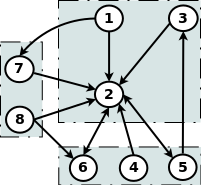

In [94]:
# Importamos una imagen que representa la partición de un grafo de 8 nodos en tres grupos
i = Image(filename='images/graph1_rand.png')
i

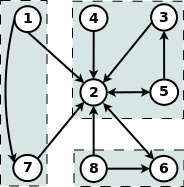

In [96]:
# Una posible representación de la partición anterior es
# X = [2,2,2,1,1,1,3,3]
# A partir del ejemplo de la representación anterior escoja una representación para 
# la siguiente partición

i = Image(filename='images/graph1_met.png')
i

In [98]:
# Compruebe la validez de la representación utilizada con la función
# ValidarRepresentacion.py
# Ejemplo:
%run ValidarRepresentacion.py [2,1,1,1,1,3,2,3]


Respuesta correcta


In [109]:
#[2,1,1,1,1,3,2,3]
#[1,2,2,2,2,3,1,3]

#[3,1,1,1,1,2,3,2]
#[1,3,3,3,3,2,1,2]

#[2,3,3,3,3,1,2,1]
#[3,2,2,2,2,1,3,1]

In [108]:
# Cuántas  posibles representaciones pueden obtenerse del grafo anterior? 
# Compruebe su respuesta utilizando la función NumeroRepresentaciones.py

%run NumeroRepresentaciones.py 6

El valor escogido es correcto.


In [140]:
# La función Eval_Bipart_instance permite cuál es el valor de una solución del problema de partición del grafo
# Utilice la función para comprobar si existe algún de tipo de simetría en la representación de este problema

def Read_Bipart_Instance(fname):   
 hdl = open(fname, 'r')           
 mylist = hdl.readlines()
 hdl.close()
 n = eval(mylist[0])      
 edge_weights = np.zeros((n,n))      # Pesos de las aristas 
 for i in range(n):
   for j,val in enumerate(mylist[i+1].split()):     
     edge_weights[i,j]=eval(val)         
 return edge_weights


def Eval_Bipart_instance(edge_weights,solution):
 n = edge_weights.shape[0]         # Número de nodos
 balance =  np.sum(solution) # Numero de nodos en una de las partes
 fval = 0                  # Peso de las aristas entre partes del grafo
 for i in range(n-1):
     for j in range(i+1,n):
       if solution[i]==1-solution[j]:      # Si estan en partes diferentes  
          fval = fval+edge_weights[i,j]
 feasible=(balance==n/2)
 return feasible,fval,balance
        
edge_weights = Read_Bipart_Instance('../Instances/BIPART/Cebe.bip.n10.1')
    
mysolution = [1,1,1,0,0,0,1,1,0,0,0]
feasible,fval,balance = Eval_Bipart_instance(edge_weights,mysolution)
print(feasible,fval,balance)        

True 712.0 5


In [117]:
d = weights.shape[0] - balance

5

In [145]:
# La función exhaustive_bip_search busca exhaustivamente en el espacio de soluciones del problema
# de la partición del grafo 
# Modifique la función para encontrar el óptimo del problema en soluciones no factibles
# ligeramente desbalanceadas, donde la diferencia entre la cantidad de nodos en las dos partes
# del grafo no sea mayor que 2

def bin_array(num, m):
    """Convert a positive integer num into an m-bit bit vector"""
    return np.array(list(np.binary_repr(num).zfill(m))).astype(np.int8)

def exhaustive_bip_search(edge_weights):
  n = weights.shape[0] 
  best_val = 10000              # Mejor valor
  best_sol = []                 # Mejor solución  
  for i in range(2**n):         # Se busca en el espacio completo
    sol = bin_array(i,n)        # Se convierte a binario
    feasible,fval,balance = Eval_Bipart_instance(edge_weights,sol)  # Se evalua la función
    d = weights.shape[0] - balance
    if fval<best_val and feasible==0 and d <=2:                     # Si es mejor que el mejor valor hasta el momento se actualiza
      best_val = fval                                     # el mejor valor
      best_sol = sol   
      print(i,best_val,best_sol)  
  return best_sol

best_sol = exhaustive_bip_search(edge_weights)
feasible,fval,balance = Eval_Bipart_instance(edge_weights,best_sol)
print(feasible,fval,balance)

255 460.0 [0 0 1 1 1 1 1 1 1 1]
383 405.0 [0 1 0 1 1 1 1 1 1 1]
479 400.0 [0 1 1 1 0 1 1 1 1 1]
507 365.0 [0 1 1 1 1 1 1 0 1 1]
511 196.0 [0 1 1 1 1 1 1 1 1 1]
1023 0 [1 1 1 1 1 1 1 1 1 1]
False 0 10


In [139]:
# Para n=10, cuando la partición del grafo está balanceada, cuál es el número de soluciones factibles?

%run SolucionesFactibles.py 45


El valor escogido es correcto.


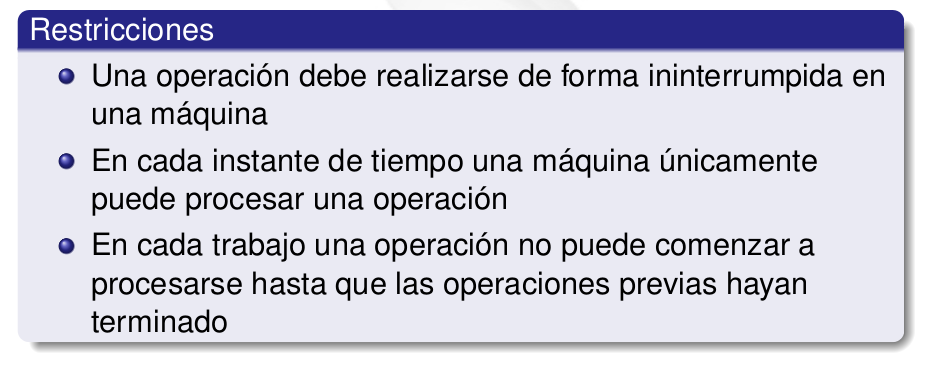

In [146]:
# Cargamos una imagen que describe un conjunto de restricciones que debe 
# satisfacer un tipo de problema dado
 
i = Image(filename='images/ProblemaTip.png')
i

In [153]:
# Identifique con cuál de los siguientes problemas se corresponden las características descritas anteriormente

# 1) Problema del agente viajero (TSP)
# 2) Problema de la sincronización de máquinas
# 3) Problema de la mochila 
# 4) Problema de la planificación (scheduling)
# 5) Problema de la ruta de vehículos (vehicle routing problem)
# 6) Problema NP completo

## Introduzca su respuesta como en el siguiente ejemplo     
## donde cada número se corresponde con una posible respuesta correcta

%run TipoDeProblemas.py 4

El valor escogido es correcto.


In [154]:
# A continuación leemos una instancia del problema de la planificación (scheduling)
# con un número de trabajos n_jobs=10 y de máquinas n_machines=10

def Read_Scheduling_Instance(fname):   
 hdl = open(fname, 'r')
 mylist = hdl.readlines()
 hdl.close()
 n_jobs = eval(mylist[1].split()[0])
 n_machines = eval(mylist[1].split()[1])

 processingtimes = np.zeros((n_jobs,n_machines))    
    
 for i in range(n_jobs):
   for j,val in enumerate(mylist[i+3].split()):   
       processingtimes[i,j] = eval(val)         
            
 return n_jobs,n_machines,processingtimes
        
n_jobs,n_machines,processingtimes = Read_Scheduling_Instance('../Instances/PFSP/Cebe.pfsp.n10.m10.1')         
print(n_jobs,n_machines,processingtimes)

10 10 [[68. 12. 16. 76. 22. 88. 95. 60. 50. 31.]
 [41. 48. 41. 83. 83. 59. 66. 55. 93.  8.]
 [40. 45. 61. 27. 86. 93. 96. 14. 98. 81.]
 [ 7. 15. 14.  9. 29. 60. 54. 29. 81.  8.]
 [88. 20. 18. 94. 99. 21. 92. 12. 41. 19.]
 [98. 48. 86. 79. 93. 65.  4. 48. 67. 35.]
 [31. 17. 52. 59. 94. 40. 14. 46. 14. 25.]
 [27. 92. 73. 40. 18. 18. 38.  5. 82. 88.]
 [ 8. 63. 58. 46. 26. 25. 18. 94. 46. 82.]
 [ 5. 99. 60. 71. 28. 46. 91. 39. 49. 99.]]


In [155]:
# La función Eval_Scheduling_instance calcula el tiempo total de terminación de los
# trabajos para el problema de planificación

def Eval_Scheduling_instance(processingtimes,solution):
 n_jobs = processingtimes.shape[0]         # Número de trabajos
 n_machines = processingtimes.shape[1]          # Número de maquinas 
 timeTable = np.zeros((1,n_machines));
 prev_machine=0;
 first_pos =solution[0];
 j = range(n_machines)
 timeTable = np.cumsum(processingtimes[j,first_pos]);

 # Calcula el tiempo total de terminación de los trabajos
 fval = timeTable[n_machines-1];
 for z in range(1,n_jobs):
    job = solution[z]-1    
    timeTable[0] = timeTable[0] + processingtimes[0,job]
    prev_machine = timeTable[0]
    for machine in range(1,n_machines):
       timeTable[machine] = np.max([prev_machine,timeTable[machine]])+ processingtimes[machine,job]
       prev_machine = timeTable[machine]
    fval = fval + timeTable[machine-1]	
 return fval

my_sol = [1,2,3,4,5,6,7,8,9,10]
fval = Eval_Scheduling_instance(processingtimes,my_sol) 
print(fval)

7537.0


In [157]:
# Cuáles de las siguientes características pueden considerarse como ventajas de los algoritmos
# heurísticos frente a los clásicos

# 1) Son aplicables de manera general
# 2) Experimentalmente muy probados
# 3) Muy desarrollados y estudiados matemáticamente
# 4) Fáciles de implementar y entender
# 5) Tiempos de cómputo razonables
# 6) Cuando convergen alcanzan siempre la solución óptima

## Introduzca su respuesta como en el siguiente ejemplo     
## donde cada número se corresponde con una posible respuesta correcta

%run VentajasHeuristicos.py 1 4 5


Todas las respuestas escogidas son correctas y no falta ninguna.
